In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housesalesprediction/kc_house_data.csv


In [3]:
data = pd.read_csv('../input/housesalesprediction/kc_house_data.csv')

In [4]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
print(len(data))

21613


In [6]:
print(len(data.columns))

21


In [7]:
((data.dtypes.unique()))

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [8]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [9]:
features = data.iloc[:,3:].columns.tolist()
target = data.iloc[:,2].name

In [10]:
from scipy.stats import pearsonr
correlations = {}
for f in features:
    data_temp = data[[f,target]]
    x1 = data_temp[f].values
    x2 = data_temp[target].values
    key = f + ' vs ' + target
    correlations[key] = pearsonr(x1,x2)[0]

In [11]:
data_correlations = pd.DataFrame(correlations, index=['Value']).T

In [12]:
data_correlations.loc[data_correlations['Value'].abs().sort_values(ascending=False).index]

,Value
sqft_living vs price,0.702035
grade vs price,0.667434
sqft_above vs price,0.605567
sqft_living15 vs price,0.585379
bathrooms vs price,0.525138
view vs price,0.397293
sqft_basement vs price,0.323816
bedrooms vs price,0.308350
lat vs price,0.307003
waterfront vs price,0.266369


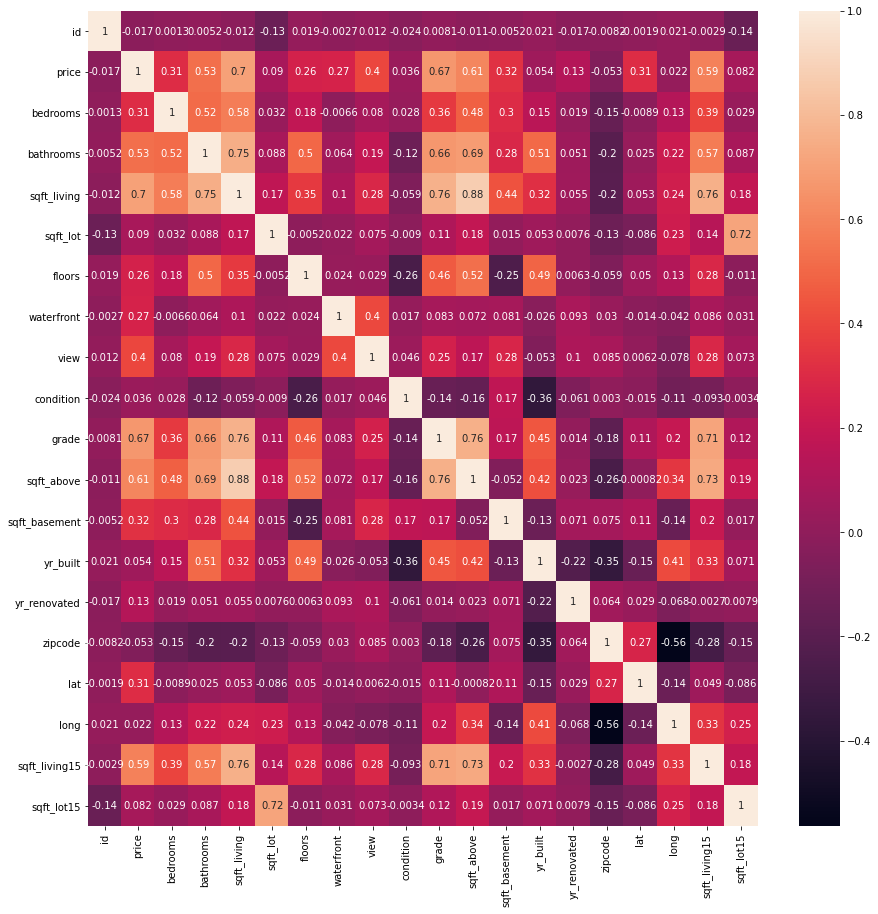

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
ig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(data.corr(), annot=True)

In [14]:
def desc(df):
    summary=pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary=summary.reset_index()
    summary['Name']=summary['index']
    summary=summary[['Name','dtypes']]
    summary['Missing']=df.isnull().sum().values
    summary['Unique']=df.nunique().values
    summary['First Value'] = df.iloc[0].values
    summary['Second Value'] = df.iloc[1].values
    summary['Third Value'] = df.iloc[2].values
    return summary

In [15]:
data['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 11, 10, 33])

In [16]:
desc(data)

,Name,dtypes,Missing,Unique,First Value,Second Value,Third Value
0,id,int64,0,21436,7129300520,6414100192,5631500400
1,date,object,0,372,20141013T000000,20141209T000000,20150225T000000
2,price,float64,0,4028,221900,538000,180000
3,bedrooms,int64,0,13,3,3,2
4,bathrooms,float64,0,30,1,2.25,1
5,sqft_living,int64,0,1038,1180,2570,770
6,sqft_lot,int64,0,9782,5650,7242,10000
7,floors,float64,0,6,1,2,1
8,waterfront,int64,0,2,0,0,0
9,view,int64,0,5,0,0,0


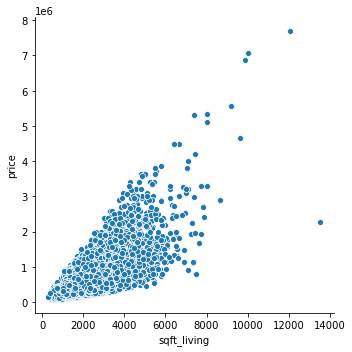

In [17]:
g = sns.relplot(data=data, x="sqft_living", y="price")

Text(0, 0.5, 'Price')

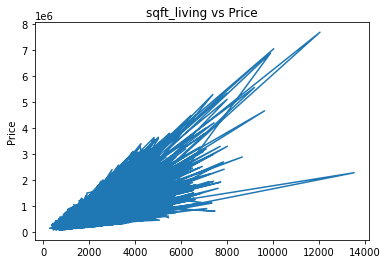

In [18]:
plt.subplot(1,1,1)
plt.plot(data['sqft_living'],data['price'])
plt.title('sqft_living vs Price')
plt.ylabel('Price')





Text(0, 0.5, 'Price')

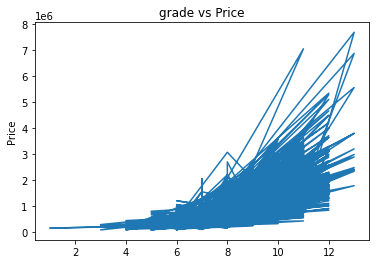

In [19]:
plt.subplot(1,1,1)
plt.plot(data['grade'],data['price'])
plt.title('grade vs Price')
plt.ylabel('Price')




Text(0, 0.5, 'Price')

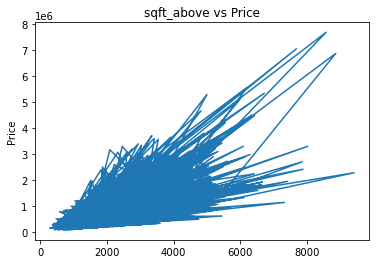

In [20]:
plt.subplot(1,1,1)
plt.plot(data['sqft_above'],data['price'])
plt.title('sqft_above vs Price')
plt.ylabel('Price')



Text(0, 0.5, 'Price')

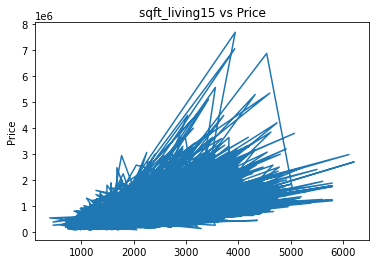

In [22]:
plt.subplot(1,1,1)
plt.plot(data['sqft_living15'],data['price'])
plt.title('sqft_living15 vs Price')
plt.ylabel('Price')


Text(0, 0.5, 'Price')

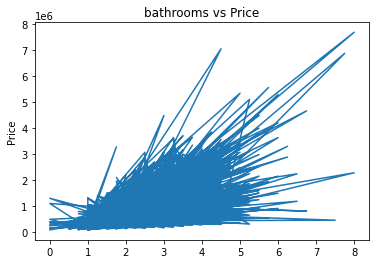

In [23]:

plt.subplot(1,1,1)
plt.plot(data['bathrooms'],data['price'])
plt.title('bathrooms vs Price')
plt.ylabel('Price')

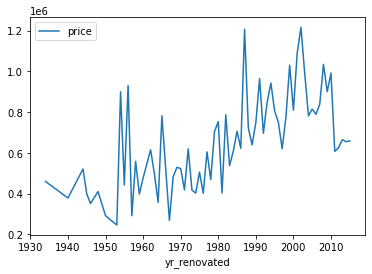

In [24]:
data[(data["yr_renovated"]>0) & (data["price"] >0)][["yr_renovated","price"]].dropna().groupby("yr_renovated").mean().plot()

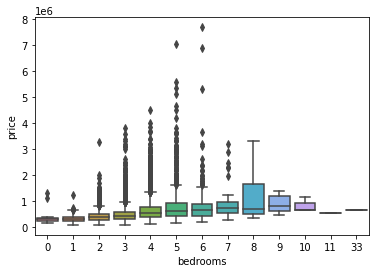

In [50]:
sns.boxplot(x=data['bedrooms'],y=data['price'])

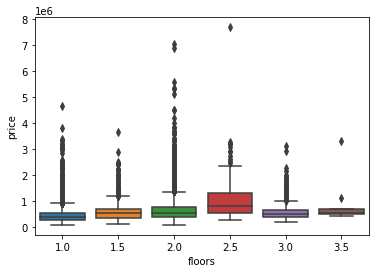

In [52]:
sns.boxplot(x=data['floors'],y=data['price'])

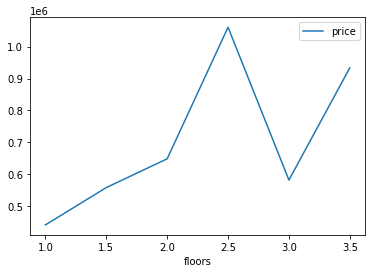

In [25]:
data[(data["floors"]>0) & (data["price"] >0)][["floors","price"]].dropna().groupby("floors").mean().plot()

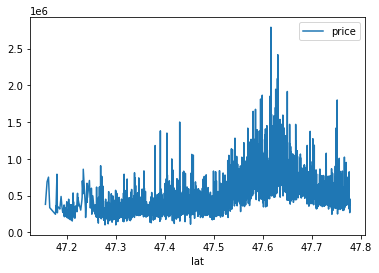

In [26]:
data[(data["lat"]>0) & (data["price"] >0)][["lat","price"]].dropna().groupby("lat").mean().plot()

[Text(0, 0.5, 'Price'), Text(0.5, 0, 'bedrooms')]

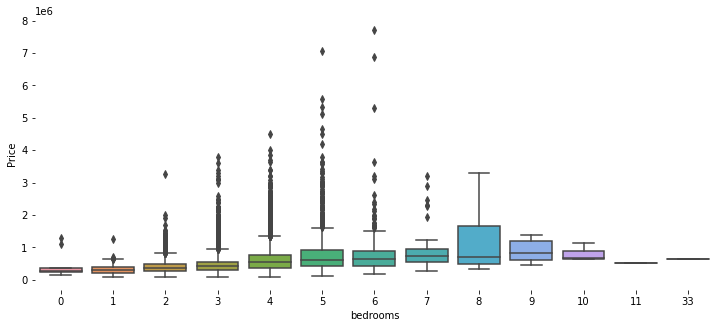

In [60]:
f, axe = plt.subplots(1, 1,figsize=(12.18,5))
sns.boxplot(x=data['bedrooms'],y=data['price'], ax=axe)
sns.despine(left=True, bottom=True)
axe.yaxis.tick_left()
axe.set(xlabel='bedrooms', ylabel='Price')

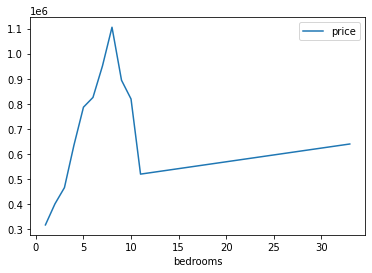

In [27]:
data[(data["bedrooms"]>0) & (data["price"] >0)][["bedrooms","price"]].dropna().groupby("bedrooms").mean().plot()

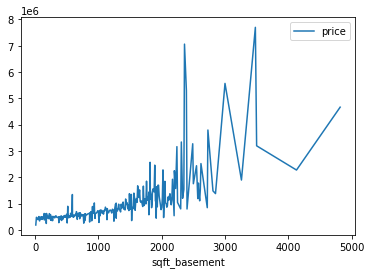

In [28]:
data[(data["sqft_basement"]>0) & (data["price"] >0)][["sqft_basement","price"]].dropna().groupby("sqft_basement").mean().plot()

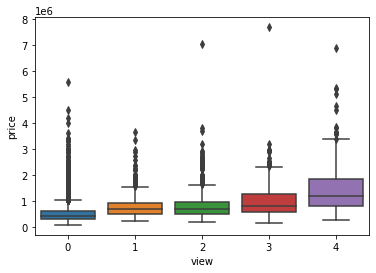

In [53]:
sns.boxplot(x=data['view'],y=data['price'])

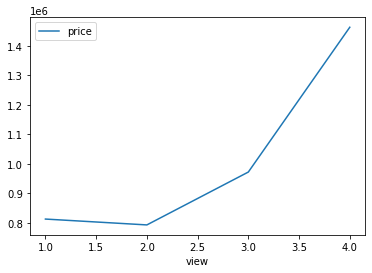

In [29]:
data[(data["view"]>0) & (data["price"] >0)][["view","price"]].dropna().groupby("view").mean().plot()

[Text(0, 0.5, 'Price'), Text(0.5, 0, 'bathrooms')]

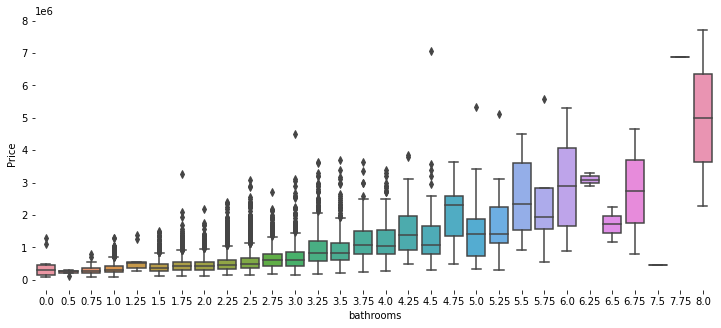

In [59]:
f, axe = plt.subplots(1, 1,figsize=(12.18,5))
sns.boxplot(x=data['bathrooms'],y=data['price'], ax=axe)
sns.despine(left=True, bottom=True)
axe.yaxis.tick_left()
axe.set(xlabel='bathrooms', ylabel='Price')

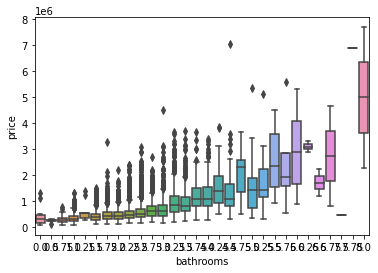

In [54]:
sns.boxplot(x=data['bathrooms'],y=data['price'])

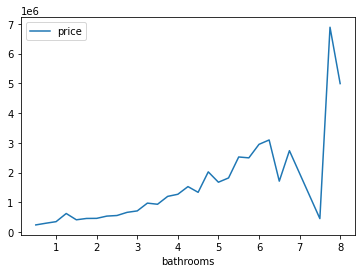

In [30]:
data[(data["bathrooms"]>0) & (data["price"] >0)][["bathrooms","price"]].dropna().groupby("bathrooms").mean().plot()

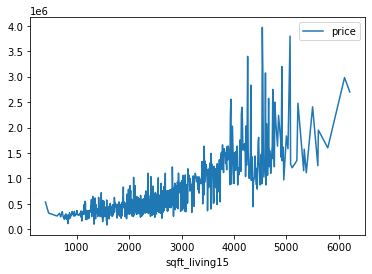

In [31]:
data[(data["sqft_living15"]>0) & (data["price"] >0)][["sqft_living15","price"]].dropna().groupby("sqft_living15").mean().plot()

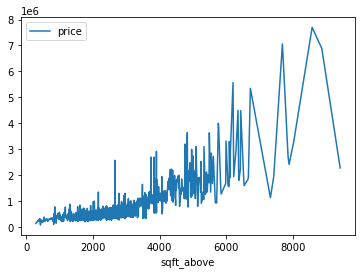

In [32]:
data[(data["sqft_above"]>0) & (data["price"] >0)][["sqft_above","price"]].dropna().groupby("sqft_above").mean().plot()

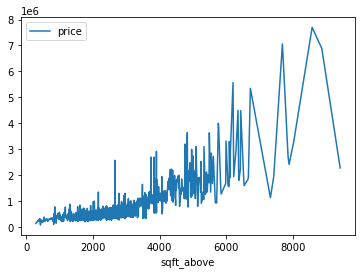

In [33]:
data[(data["sqft_above"]>0) & (data["price"] >0)][["sqft_above","price"]].dropna().groupby("sqft_above").mean().plot()

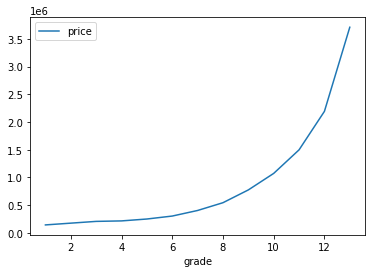

In [34]:
data[(data["grade"]>0) & (data["price"] >0)][["grade","price"]].dropna().groupby("grade").mean().plot()

[Text(0, 0.5, 'Price'), Text(0.5, 0, 'Grade')]

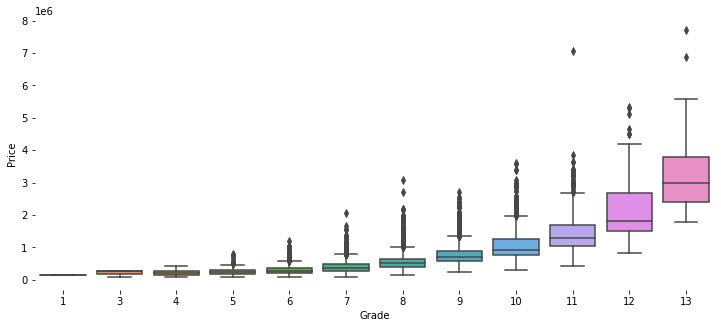

In [57]:
f, axe = plt.subplots(1, 1,figsize=(12.18,5))
sns.boxplot(x=data['grade'],y=data['price'], ax=axe)
sns.despine(left=True, bottom=True)
axe.yaxis.tick_left()
axe.set(xlabel='Grade', ylabel='Price')

In [ ]:
# difference between above and below

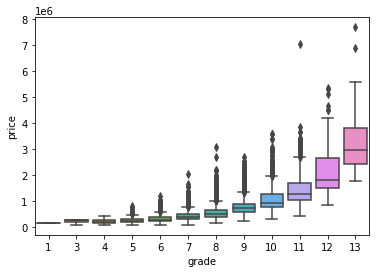

In [55]:
sns.boxplot(x=data['grade'],y=data['price'])

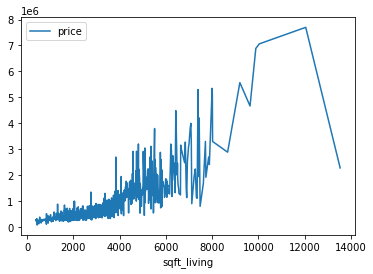

In [35]:
data[(data["bathrooms"]>0) & (data["price"] >0)][["sqft_living","price"]].dropna().groupby("sqft_living").mean().plot()

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression


In [37]:
import sklearn
from sklearn import linear_model

In [38]:
regr = linear_model.LinearRegression()
new_data = data[['sqft_living','grade', 'sqft_above', 'sqft_living15','bathrooms','view','sqft_basement','lat','waterfront','yr_built','floors','yr_renovated','bedrooms']]

In [39]:
X = new_data.values
y = data.price.values

In [40]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2)

In [42]:
regr.fit(X_train, y_train)
print(regr.predict(X_test))

[612712.68460724 355057.35313786 427235.21024174 ... 412729.37781116
 131245.51566333 191685.14241103]


In [43]:
regr.score(X_test,y_test)

0.6975887520689107

In [44]:
import math
print("RMSE: %.2f"
      % math.sqrt(np.mean((regr.predict(X_test) - y_test) ** 2)))

RMSE: 206716.39


In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
from sklearn.metrics import explained_variance_score
import xgboost
xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

In [47]:
traindf, testdf = train_test_split(X_train, test_size = 0.3)
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.08, max_delta_step=0, max_depth=7,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.75,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [48]:
predictions = xgb.predict(X_test)
print(explained_variance_score(predictions,y_test))

0.8093317411799104
